Twitter Analysis of News Sources

- It seems like there  is a general feeling that towards the media that is negative as 4/5 overall news sources have an overall negative twitter sentiment. CBS is the only news source with a positive overall twitter sentiment in their most 100 recent tweets.
- There are many tweets that are neutral or have a compound score of zero. This could possibly be due to tweeting hyperlinks rather than adding actual content. 
- Twitter sentiment can also vary widely depending on when the data from twitter is grabbed. Some of the times that I grabbed data looked very different based on the latest 100 tweets. As such, it would be very interesting to read tweets directly following a big news story.

In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
# Twitter API Keys
from config import twitterConsumerKey, twitterConsumerSecret, twitterAccessToken, twitterAccessTokenSecret

auth = tweepy.OAuthHandler(twitterConsumerKey, twitterConsumerSecret)
auth.set_access_token(twitterAccessToken, twitterAccessTokenSecret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

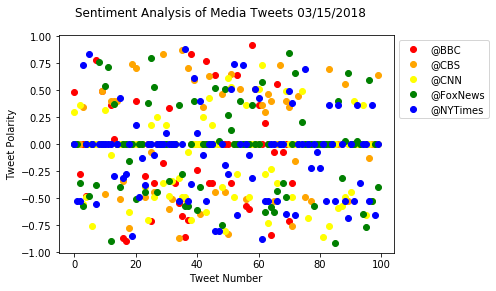

In [2]:
newsSource = ["@BBC", "@CBS", "@CNN", "@FoxNews", "@NYTimes"]
colors = ['red', 'orange', 'yellow', 'green', 'blue']

now = datetime.now()
now = now.strftime("%m/%d/%Y")
# xrange = np.arange(100)
# print (xrange)


# fig = plt.figure()
fig1, ax1 = plt.subplots()
totals = []
dictforDF = []

for x in np.arange(len(newsSource)):
    source = newsSource[x]
    publicTweets = api.search(source, count = 100)
    compoundList = []
    
    for tweet in publicTweets['statuses']:
        text = tweet['text']
        results = analyzer.polarity_scores(text)
        compound = results['compound']
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweet_dict = {"source":source, "tweet":text, "compound":compound, "positive":pos, "neutral":neu, "negative":neg}
        compoundList.append(compound)
    dictforDF.append(tweet_dict)
    
    # First Graph
    ax1.plot(np.arange(len(compoundList)), compoundList, color=colors[x], marker='o', linestyle='solid', 
             linewidth=0, label=source)
    
    totals.append(np.sum(compoundList).round(2))

ax1.legend (loc='best', bbox_to_anchor=(1,1))
fig1.suptitle(f'Sentiment Analysis of Media Tweets {now}')
ax1.set_xlabel('Tweet Number')
ax1.set_ylabel('Tweet Polarity')
# print (totals)
tweetDF = pd.DataFrame(dictforDF)
#graph 2
plt.show()

In [3]:
tweetDF.head()

,compound,negative,neutral,positive,source,tweet
0,-0.3612,0.102,0.898,0.000,@BBC,RT @maxkeiser: When I worked for @BBC I was to...
1,0.6369,0.000,0.756,0.244,@CBS,RT @ozerhan0606: @RecordingAcad @eltonofficial...
2,0.0000,0.000,1.000,0.000,@CNN,RT @lavndrblue: IS ANYONE PAYING ATTENTION??\n...
3,-0.4023,0.213,0.787,0.000,@FoxNews,@FoxNews @amymariewillard We can't trust Sessi...
4,0.0000,0.000,1.000,0.000,@NYTimes,RT @DavidCayJ: Below from @nytimes a most reve...


[-3.9500000000000002, 3.3100000000000001, -10.82, -4.4000000000000004, -8.1300000000000008]


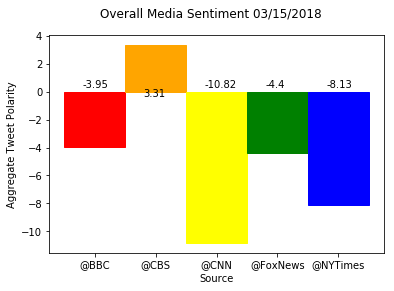

In [4]:
print (totals)
x_axis = np.arange(len(newsSource))
aggregate = plt.bar(x_axis, totals, align = "edge", width = 1)

for x in np.arange(len(newsSource)):
    aggregate[x].set_color(colors[x])
    if totals[x] > 0:
        plt.text(x+.3, max(totals)*-.10, totals[x])
    else:
        plt.text(x+.3, max(totals)*.10, totals[x])

tick_location = [value + .5 for value in x_axis]
plt.xticks(tick_location, newsSource)
plt.suptitle(f'Overall Media Sentiment {now}')
plt.xlabel('Source')
plt.ylabel('Aggregate Tweet Polarity')
plt.show()